In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [178]:
# Read the data
df = pd.read_excel('data.xlsx')

# Number of sample points
N = 100

# sampling frequency
fs = 100

# Print the first 5 rows
df.head()

,time,Sum
0,0.00,8.000000
1,0.01,8.882242
2,0.02,9.382494
3,0.03,9.501110
4,0.04,9.258440


In [179]:
# Time domain signal
t = df['time'].values
y = df['Sum'].values

t = t[:N]
y = y[:N]

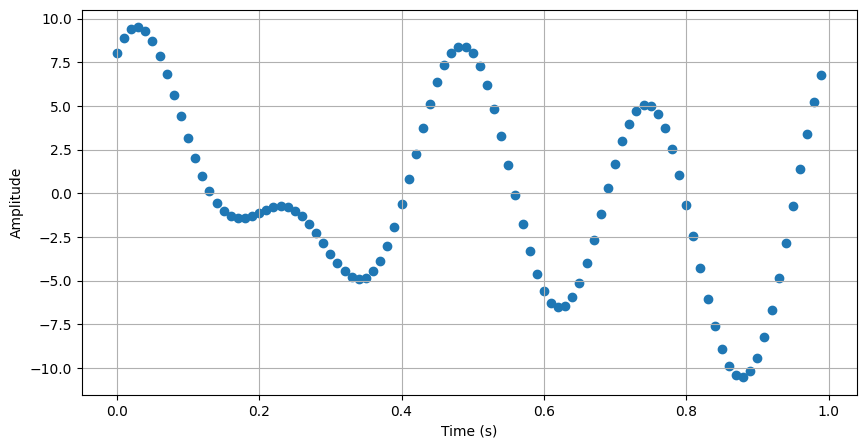

In [180]:
# Plot the signal as dots
plt.figure(figsize=(10,5))
plt.scatter(t, y)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

In [181]:
#DFT
ReX = np.zeros(N)
ImX = np.zeros(N)

for k in range(N):
    for n in range(N):
        ReX[k] += y[n]*np.cos(2*np.pi*k*n/N)
        ImX[k] -= y[n]*np.sin(2*np.pi*k*n/N)




In [182]:
ReXAvg = np.zeros(N)
ImXAvg = np.zeros(N)

for k in range(N):
    if k == 0:
        ReXAvg[k] = ReX[k]/N
    elif k == N/2:
        ReXAvg[k] = ReX[k]/N
    else:
        ReXAvg[k] = 2*ReX[k]/N

for k in range(N):
    ImXAvg[k] = -2*ImX[k]/N

frequency =np.zeros(N)
for k in range(N):
    frequency[k] = k*fs/N



In [183]:
#to xlsx
df = pd.DataFrame({'K':t,'Real':ReX,'Imaginary':ImX,'RealAVG':ReXAvg,'ImaginaryAVG':ReXAvg,'Frequency':frequency})
df.to_excel('DFT.xlsx', index=False)


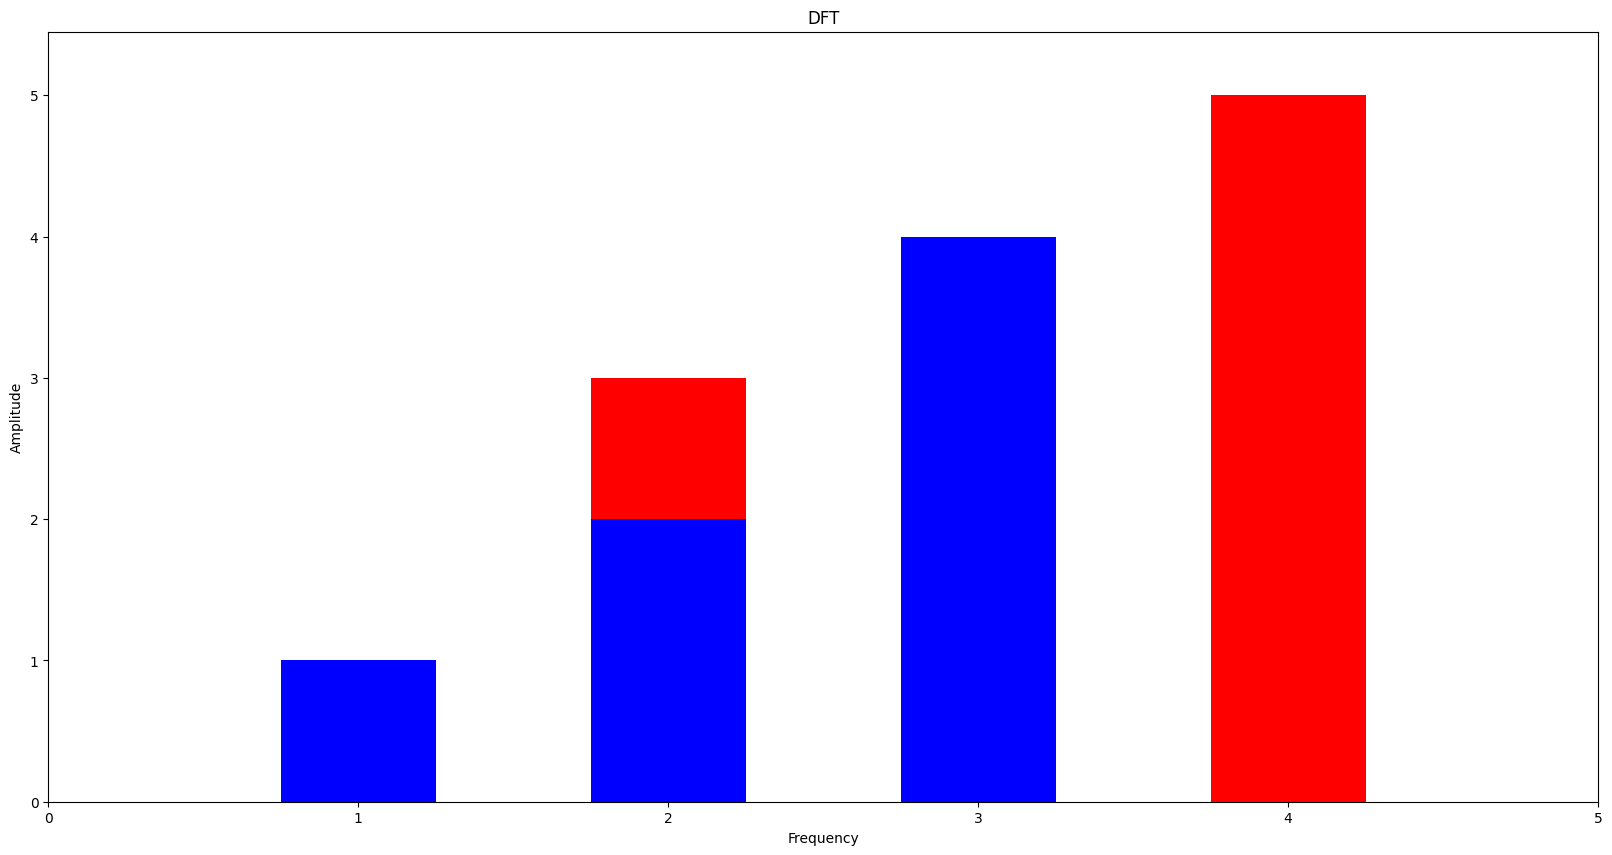

In [184]:
#Plot the DFT
plt.figure(figsize=(20,10))
plt.bar(frequency,ReXAvg, width=0.5, color='r')
plt.bar(frequency,ImXAvg, width=0.5, color='b')
plt.xlim(0, 5)
plt.ylim(0)
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.title('DFT')
plt.show()


[2, 4]
[1, 2, 3]


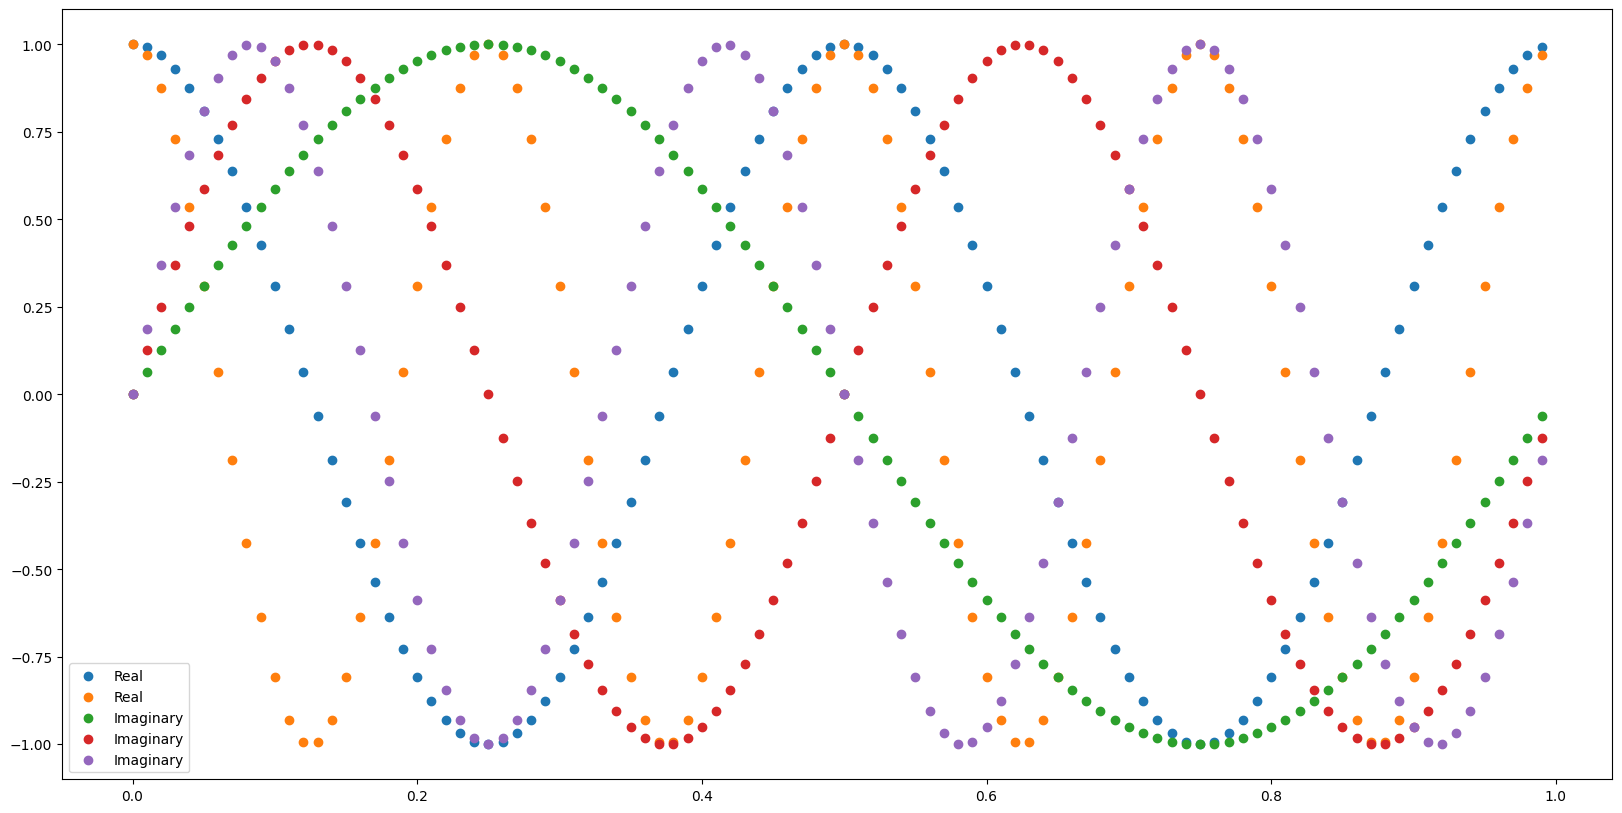

In [185]:
ReAns=[]
ImAns=[]
for i in range(N//2):
    if ReXAvg[i]>0.5:
        ReAns.append(i)
    if ImXAvg[i]>0.5:
        ImAns.append(i)
print(ReAns)
print(ImAns)

#plot sin of ImAns and cos of ReAns
plt.figure(figsize=(20,10))
for i in range(len(ReAns)):
    plt.scatter(t, np.cos(2*np.pi*ReAns[i]*t), label='Real')
for i in range(len(ImAns)):
    plt.scatter(t, np.sin(2*np.pi*ImAns[i]*t), label='Imaginary')
plt.legend()
plt.show()


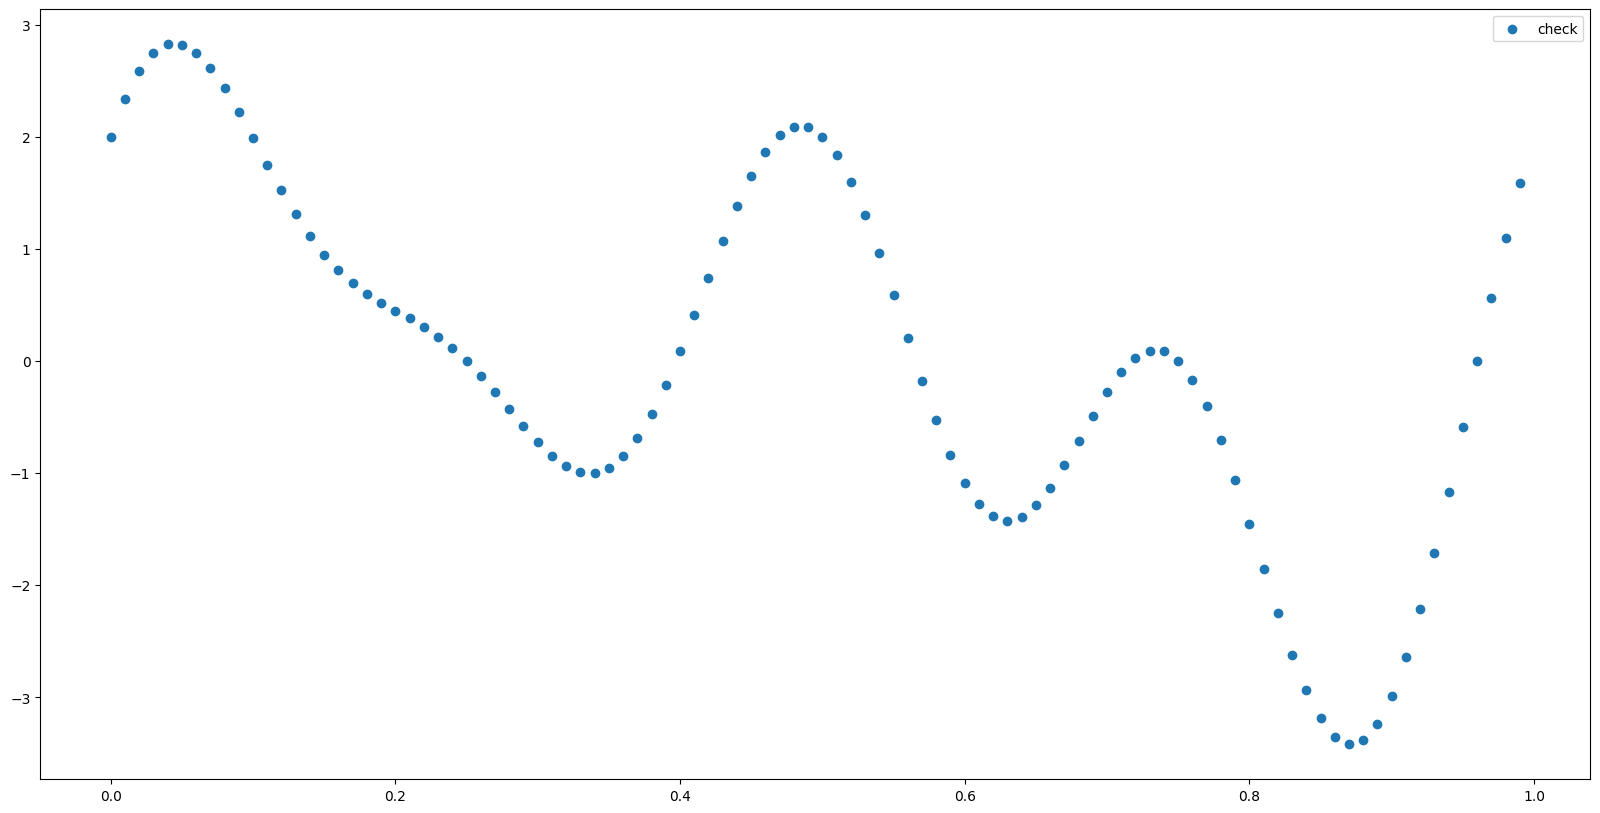

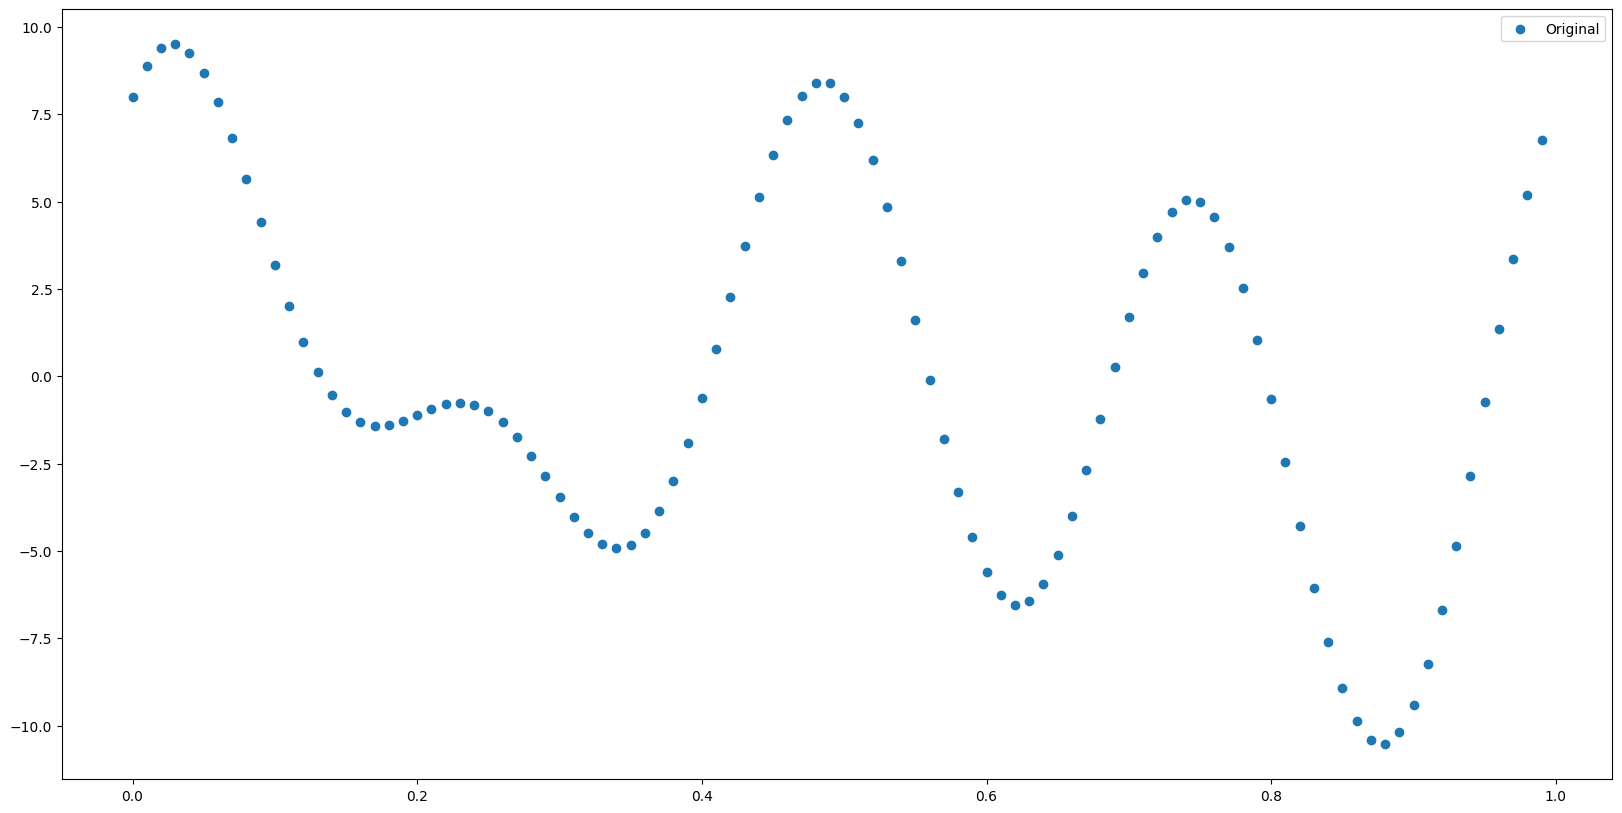

In [186]:
#plot sin of ImAns and cos of ReAns check
check =0;
plt.figure(figsize=(20,10))
for i in range(len(ReAns)):
    check += np.cos(2*np.pi*ReAns[i]*t)
for i in range(len(ImAns)):
    check += np.sin(2*np.pi*ImAns[i]*t)

plt.scatter(t, check, label='check')
plt.legend()
plt.show()

#plot the original signal
plt.figure(figsize=(20,10))
plt.scatter(t, y, label='Original')
plt.legend()
plt.show()
